# **Neural Network Classification with PyTorch** 🥷

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options )

## What is a classification problem?

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:

| Problem type | What is it? | Example |
| ----- | ----- | ----- |
| **Binary classification** | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| **Multi-class classification** | Target can be one of more than two options | Decide whether a photo is of food, a person or a dog. |
| **Multi-label classification** | Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosophy). |

<div align="center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-different-classification-problems.png" alt="various different classification in machine learning such as binary classification, multiclass classification and multilabel classification" width=900/>
</div>


<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" alt="a pytorch workflow flowchart" width=900/>

Except instead of trying to predict a straight line (predicting a number, also called a regression problem), we'll be working on a **classification problem**.

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Architecture of a classification neural network** | Neural networks can come in almost any shape or size, but they typically follow a similar floor plan. |
| **1. Getting binary classification data ready** | Data can be almost anything but to get started we're going to create a simple binary classification dataset. |
| **2. Building a PyTorch classification model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop** specific to classification. |
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Improving a model (from a model perspective)** | We've trained and evaluated a model but it's not working, let's try a few things to improve it. |
| **6. Non-linearity** | So far our model has only had the ability to model straight lines, what about non-linear (non-straight) lines? |
| **7. Replicating non-linear functions** | We used **non-linear functions** to help model non-linear data, but what do these look like? |
| **8. Putting it all together with multi-class classification** | Let's put everything we've done so far for binary classification together with a multi-class classification problem. |

## 0. Architecture of a classification neural network

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

## 1. Make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# make a 1000 sample
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


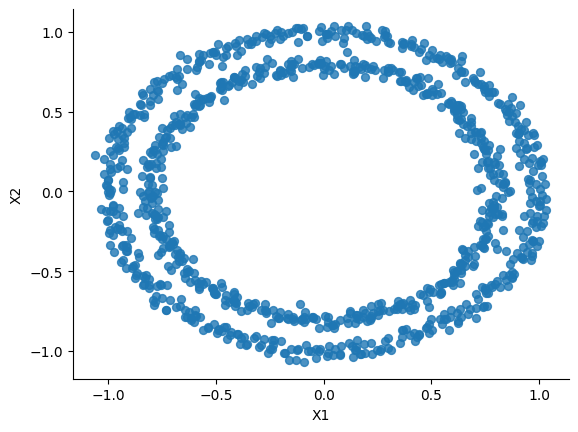

In [ ]:
# @title X1 vs X2

from matplotlib import pyplot as plt
circles.plot(kind='scatter', x='X1', y='X2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

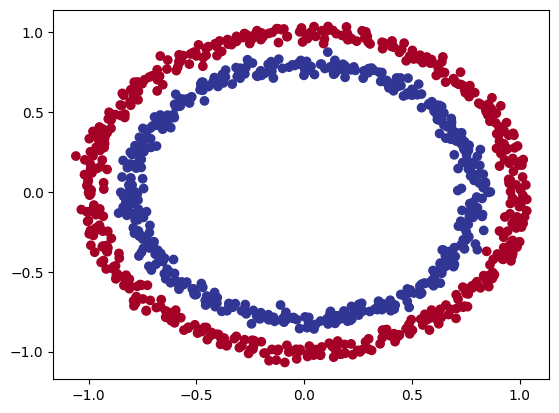

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

Note : The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.}

### 1.1 Check input and output shapes

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
# turn data into tensors from numoy
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostice code
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Let's create a model class that:
1. Subclasses `nn.Module` (almost all PyTorch models are subclasses of `nn.Module`).
2. Creates 2 `nn.Linear` layers in the constructor capable of handling the input and output shapes of `X` and `y`.
3. Defines a `forward()` method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target `device`.

In [ ]:
# Constructing a model by subclass nn.Module
class CircleModelV0(nn.Module):
  def __init__(self,) :
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # 3. Define a forward() method outlines the forward pass
  def forward(self,x):
     return self.layer_2(self.layer_1(x)) # x-> layer_1 -> layer_2 -> output


# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0()
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Let's replicate the model above using nn.Sequential() # it just a simple presentation of our model
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)

)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6736, -0.6534],
                      [ 0.4823,  0.5283],
                      [-0.2070,  0.2367],
                      [-0.3919,  0.6633],
                      [ 0.1423, -0.3596]])),
             ('0.bias', tensor([ 0.0811,  0.1173, -0.6420,  0.6401,  0.6053])),
             ('1.weight',
              tensor([[ 0.3034, -0.1416, -0.0485, -0.4064,  0.1656]])),
             ('1.bias', tensor([-0.1672]))])

The only rule with hidden units is that the next layer, in our case, `self.layer_2` has to take the same `in_features` as the previous layer `out_features`.

That's why `self.layer_2` has `in_features=5`, it takes the `out_features=5` from `self.layer_1` and performs a linear computation on them, turning them into `out_features=1` (the same shape as `y`).

![A visual example of what a classification neural network with linear activation looks like on the tensorflow playground](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-linear-activation.png)
*A visual example of what a similar classification neural network to the one we've just built looks like. Try creating one of your own on the [TensorFlow Playground website](https://playground.tensorflow.org/).*

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test)
print(f"Lenght of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Lenght of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.6769],
        [-0.8783],
        [-0.0388],
        [-0.8582],
        [ 0.1363],
        [ 0.0120],
        [-0.6938],
        [-0.4848],
        [-0.0471],
        [-0.8899]])

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

 Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss | Binary classification | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Multi-class classification | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) |
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |

Table of various loss functions and optimizers, there are more but these are some common ones you'll see.

Since we're working with a binary classification problem, let's use a binary cross entropy loss function.

Note: Recall a loss function is what measures how wrong your model predictions are, the higher the loss, the worse your model.

Also, PyTorch documentation often refers to loss functions as "loss criterion" or "criterion", these are all different ways of describing the same thing.

PyTorch has two binary cross entropy implementations:

torch.nn.BCELoss() - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
torch.nn.BCEWithLogitsLoss() - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in (we'll see what this means soon).

Which one should you use?

The [documentation for `torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) states that it's more numerically stable than using `torch.nn.BCELoss()` after a `nn.Sigmoid` layer.

So generally, implementation 2 is a better option. However for advanced usage, you may want to separate the combination of `nn.Sigmoid` and `torch.nn.BCELoss()` but that is beyond the scope of this notebook.

In [ ]:
# loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss() it has a sigmoid layer (nn.Sigmoid) built-in

# optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [ ]:
# Calculate Accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

### 3. Train model

To train our model, we're going to need to build a training loop

Steps in training:

<details>
    <summary>PyTorch training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing its
            <code>forward()</code> function
            calculations (<code>model(x_train)</code>).
        </li>
        <li><b>Calculate the loss</b> - The model's outputs (predictions) are compared to the ground truth and evaluated
            to see how
            wrong they are (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - The optimizers gradients are set to zero (they are accumulated by default) so they
            can be
            recalculated for the specific training step (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Perform backpropagation on the loss</b> - Computes the gradient of the loss with respect for every model
            parameter to
            be updated (each parameter
            with <code>requires_grad=True</code>). This is known as <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step the optimizer (gradient descent)</b> - Update the parameters with <code>requires_grad=True</code>
            with respect to the loss
            gradients in order to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>

### 3.1 Going form raw logits -> prediction probabilities -> prediction labels

Our models outputs are going to be raw **logits** .

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. ssigmoid for binary classification and softmax for muliticlass classification).

Then we can convert our model's predictions probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [ ]:
# View the first 5 outpusts of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test)[:5]
y_logits

tensor([[-0.6769],
        [-0.8783],
        [-0.0388],
        [-0.8582],
        [ 0.1363]])

In [ ]:
# Use the sigmoid activation  function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3370],
        [0.2935],
        [0.4903],
        [0.2977],
        [0.5340]])


The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

More specificially:
* If `y_pred_probs` >= 0.5, `y=1` (class 1)
* If `y_pred_probs` < 0.5, `y=0` (class 0)

In [ ]:
# find the predicted labels
y_preds  = torch.round(y_pred_probs)

# In full raw logits -> prediction probabilities -> prediction labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)))[:5]

# check for equality
print(torch.eq(y_pred_labels.squeeze(),y_preds.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 1.])

### 3.2 Building a Training and testing loop

In [ ]:
torch.manual_seed(42)

# Set the number of wpochs
epochs = 100

# Build training and evaluation loop

for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. calculate loss / accuracy
  loss = loss_fn(y_logits, y_train) # Using nn.BCEWithLogitsLoss works with raw logits

  acc = accuracy_fn(y_true=y_train,y_pred=y_pred) # custom by build in this out notbook

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits= model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate test loss/acc
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)


  # print out what's happenin'
  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} , Accuracy : {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.72514 , Accuracy : 47.12% | Test loss: 0.71185, Test acc: 51.50%
Epoch: 10 | Loss: 0.72333 , Accuracy : 46.50% | Test loss: 0.71011, Test acc: 51.50%
Epoch: 20 | Loss: 0.72168 , Accuracy : 46.75% | Test loss: 0.70852, Test acc: 51.50%
Epoch: 30 | Loss: 0.72016 , Accuracy : 47.12% | Test loss: 0.70709, Test acc: 51.00%
Epoch: 40 | Loss: 0.71876 , Accuracy : 47.12% | Test loss: 0.70579, Test acc: 51.50%
Epoch: 50 | Loss: 0.71748 , Accuracy : 47.38% | Test loss: 0.70460, Test acc: 52.00%
Epoch: 60 | Loss: 0.71629 , Accuracy : 47.75% | Test loss: 0.70352, Test acc: 52.00%
Epoch: 70 | Loss: 0.71520 , Accuracy : 48.00% | Test loss: 0.70254, Test acc: 52.50%
Epoch: 80 | Loss: 0.71418 , Accuracy : 48.00% | Test loss: 0.70164, Test acc: 51.50%
Epoch: 90 | Loss: 0.71324 , Accuracy : 48.00% | Test loss: 0.70082, Test acc: 51.00%


## 4.Make predictions and evaluate the model

From the metrics it looks like our model isn't learn anything ...

so to inspect it let's make some predictions and make them visual:

In other words, "Visualize! 📼"


To do so, we'll write some code to download and import the [`helper_functions.py` script](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) from the [Learn PyTorch for Deep Learning repo](https://github.com/mrdbourke/pytorch-deep-learning).

It contains a helpful function called `plot_decision_boundary()` which creates a NumPy meshgrid to visually plot the different points where our model is predicting certain classes.

We'll also import `plot_predictions()` which we wrote in notebook 01 to use later.

In [ ]:
## 4.Make predictions and evaluate the model
import requests
from pathlib import Path

# Download helper function from learn pytorch repo(if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open("helper_functions.py","wb") as f:
    f.write(request.content)
from helper_functions_NN_PyTorch import plot_decision_boundary, plot_predictions

Download helper_functions.py


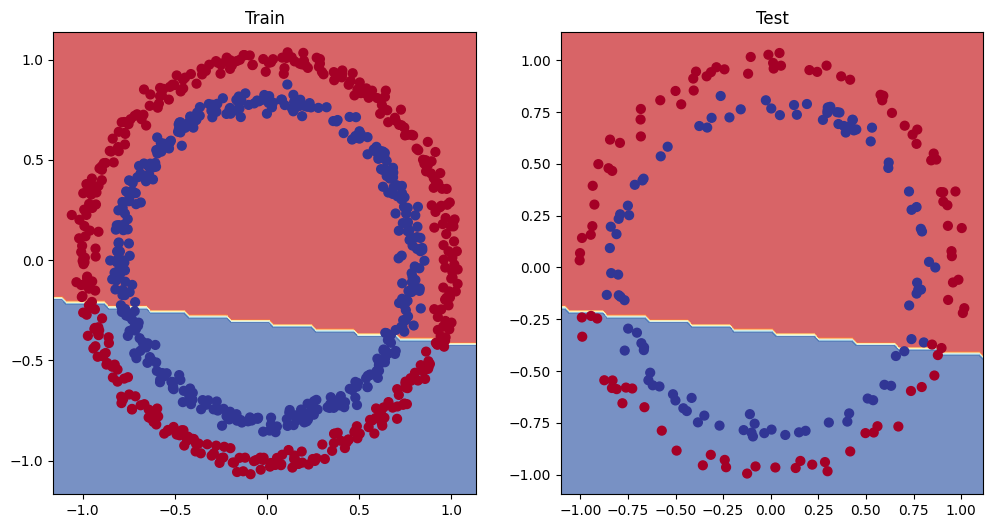

In [ ]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_0,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_0,X=X_test,y=y_test)

Oh wow, it seems like we've found the cause of model's performance issue.

It's currently trying to split the red and blue dots using a straight line...

That explains the 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.

In machine learning terms, our model is **underfitting**, meaning it's not learning predictive patterns from the data.

How could we improve this?

## 5. Improving a model (from a model perspective)

| Model improvement technique* | What does it do? |
| ----- | ----- |
| **Add more layers** | Each layer *potentially* increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data. More layers are often referred to as making your neural network *deeper*. |
| **Add more hidden units** | Similar to the above, more hidden units per layer means a *potential* increase in learning capabilities of the model. More hidden units are often referred to as making your neural network *wider*. |
| **Fitting for longer (more epochs)** | Your model might learn more if it had more opportunities to look at the data. |
| **Changing the activation functions** | Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint). |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| **Change the loss function** | Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem. |
| **Use transfer learning** | Take a pretrained model from a problem domain similar to yours and adjust it to your own problem. We cover transfer learning in [notebook 06](https://www.learnpytorch.io/06_pytorch_transfer_learning/).

> **Note:** *because you can adjust all of these by hand, they're referred to as **hyperparameters**.
>

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self,) :
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1()

In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss() it has a sigmoid layer (nn.Sigmoid) built-in

# optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)

# Set the number of wpochs
epochs = 1000

# Build training and evaluation loop

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. calculate loss / accuracy
  loss = loss_fn(y_logits, y_train) # Using nn.BCEWithLogitsLoss works with raw logits

  acc = accuracy_fn(y_true=y_train,y_pred=y_pred) # custom by build in this out notbook

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits= model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate test loss/acc
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)


  # print out what's happenin'
  if epoch % 100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} , Accuracy : {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396 , Accuracy : 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305 , Accuracy : 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299 , Accuracy : 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298 , Accuracy : 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298 , Accuracy : 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298 , Accuracy : 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298 , Accuracy : 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298 , Accuracy : 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298 , Accuracy : 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298 , Accuracy : 51.00% | Test loss: 0.69468, Test acc: 46.00%


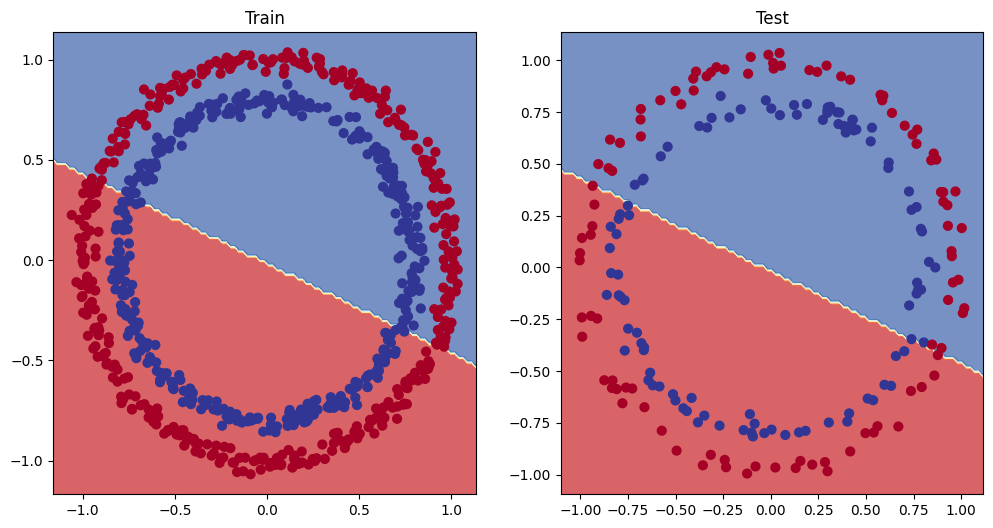

In [ ]:
# Plot the decision boundary
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_1,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_1,X=X_test,y=y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem


In [ ]:
# Create  some data(same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight*X_regression+bias # Linear regression

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test split
train_split = int(0.8*len(X_regression))
X_train_regression , y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression , y_test_regression = X_regression[train_split:], y_regression[train_split:]

In [ ]:
# check the length of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

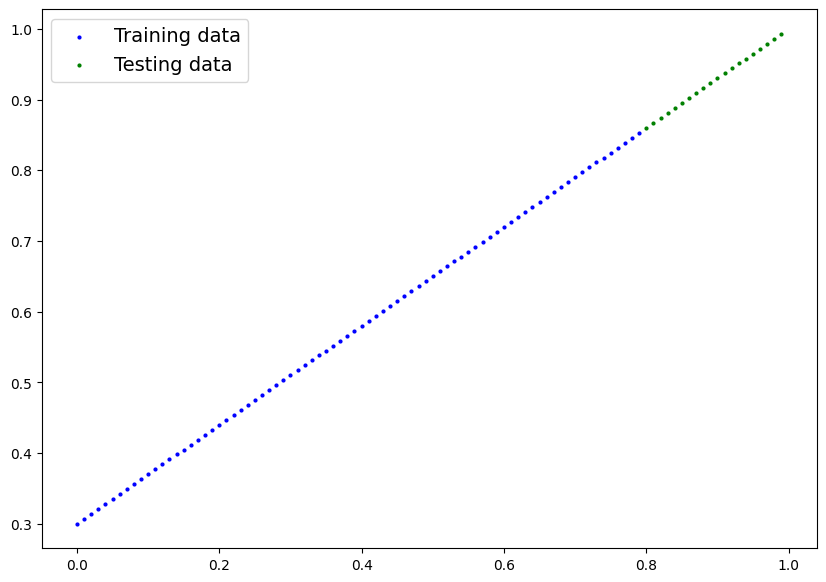

In [ ]:
plot_predictions(train_data=X_train_regression,train_labels=y_train_regression, test_data=X_test_regression, test_labels=y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

In [ ]:
# same architecture (but using nn.sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)

In [ ]:
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:

# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [ ]:
# Train the model
torch.manual_seed(42)
# Set the number of wpochs
epochs = 1000

# Build training and evaluation loop

for epoch in range(epochs):
    ### Training
    model_1.train()
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate the loss
    loss = loss_fn(y_train_regression, y_pred)


    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backward propagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()  # by default how the optimizer changes will accumulate through the loop so
                      # ... we have to zero them above in step 3 for the next iteration of the loop

    ### Testing
    model_0.eval()  # turns off different settings in the model not needed for evaluation/testing
    with torch.inference_mode():  # turns off gradient tracking & a couple of things behind the scenes
        # with torch.no_grad():  # may also see torch.no_grad()

        # 1. Do the forward pass
        test_pred = model_2(X_test_regression)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test_regression)

        # Print out what's happening
        if epoch % 100 == 0:
          print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.7598584890365601 | Test loss: 0.9110288619995117
Epoch: 100 | Loss: 0.02857953868806362 | Test loss: 0.0008127152686938643
Epoch: 200 | Loss: 0.025325417518615723 | Test loss: 0.002092066453769803
Epoch: 300 | Loss: 0.021374788135290146 | Test loss: 0.0030509470961987972
Epoch: 400 | Loss: 0.019644945859909058 | Test loss: 0.003407782409340143
Epoch: 500 | Loss: 0.019402235746383667 | Test loss: 0.0038725673221051693
Epoch: 600 | Loss: 0.019032442942261696 | Test loss: 0.003789058420807123
Epoch: 700 | Loss: 0.01878291741013527 | Test loss: 0.003813347313553095
Epoch: 800 | Loss: 0.01839740015566349 | Test loss: 0.0032872825395315886
Epoch: 900 | Loss: 0.017980266362428665 | Test loss: 0.00360372057184577


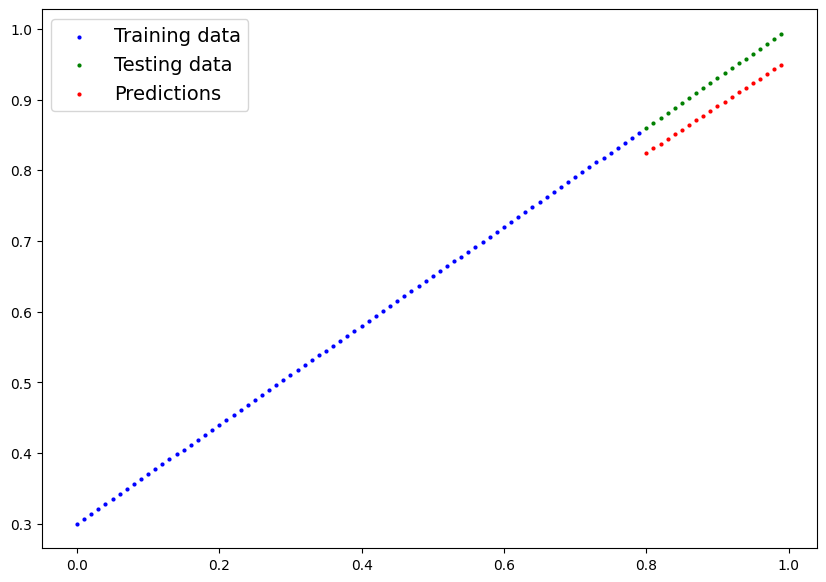

In [ ]:
# Making predictions and evalutiing the model
model_2.eval()
with torch.inference_mode():
  y_new_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression,train_labels=y_train_regression,test_data=X_test_regression,test_labels=y_test_regression,predictions=y_new_preds)



## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data(red and blue circles)

In [ ]:
# Make and plot data
import sklearn
from sklearn.datasets import make_circles

# make a 1000 sample
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,noise=0.03,random_state=42)

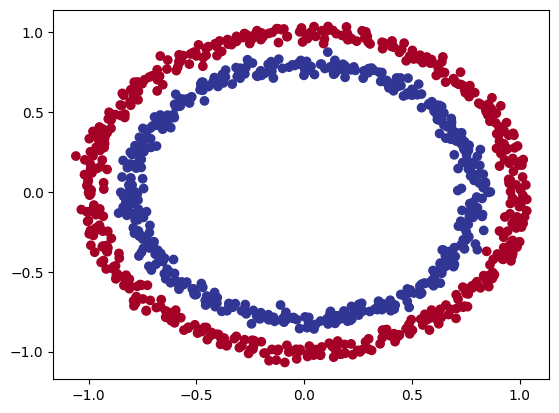

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
import torch
# turn data into tensors from numoy
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:

# Split the data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

Artificial neural network are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data

In [ ]:
# Build a model with non-linear model
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features=2, out_features=10)
    self.layer_2= nn.Linear(in_features=10, out_features=10)
    self.layer_3= nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
   # where shoud we put our non-linear activatioon functions?
   return self.layer_3(self.layer_2(self.relu(self.layer_1(x))))


model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss() it has a sigmoid layer (nn.Sigmoid) built-in

# optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(),lr=0.1)

### 6.3 Training a model with non-linearity

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)

# Set the number of wpochs
epochs = 1000

# Build training and evaluation loop

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. calculate loss / accuracy
  loss = loss_fn(y_logits, y_train) # Using nn.BCEWithLogitsLoss works with raw logits

  acc = accuracy_fn(y_true=y_train,y_pred=y_pred) # custom by build in this out notbook

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    # forward pass
    test_logits= model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate test loss/acc
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)


  # print out what's happenin'
  if epoch % 100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} , Accuracy : {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69441 , Accuracy : 50.00% | Test loss: 0.69412, Test acc: 50.00%
Epoch: 100 | Loss: 0.68984 , Accuracy : 52.38% | Test loss: 0.68935, Test acc: 51.00%
Epoch: 200 | Loss: 0.68707 , Accuracy : 58.25% | Test loss: 0.68601, Test acc: 59.00%
Epoch: 300 | Loss: 0.68338 , Accuracy : 53.87% | Test loss: 0.68177, Test acc: 58.00%
Epoch: 400 | Loss: 0.67826 , Accuracy : 53.87% | Test loss: 0.67591, Test acc: 57.00%
Epoch: 500 | Loss: 0.67058 , Accuracy : 53.25% | Test loss: 0.66753, Test acc: 58.00%
Epoch: 600 | Loss: 0.65828 , Accuracy : 59.13% | Test loss: 0.65466, Test acc: 59.00%
Epoch: 700 | Loss: 0.63517 , Accuracy : 71.75% | Test loss: 0.63262, Test acc: 75.00%
Epoch: 800 | Loss: 0.59027 , Accuracy : 85.88% | Test loss: 0.59330, Test acc: 87.00%
Epoch: 900 | Loss: 0.51050 , Accuracy : 94.12% | Test loss: 0.52613, Test acc: 90.50%


### 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]


(tensor([1., 1., 1., 0., 1., 1., 0., 0., 1., 1.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

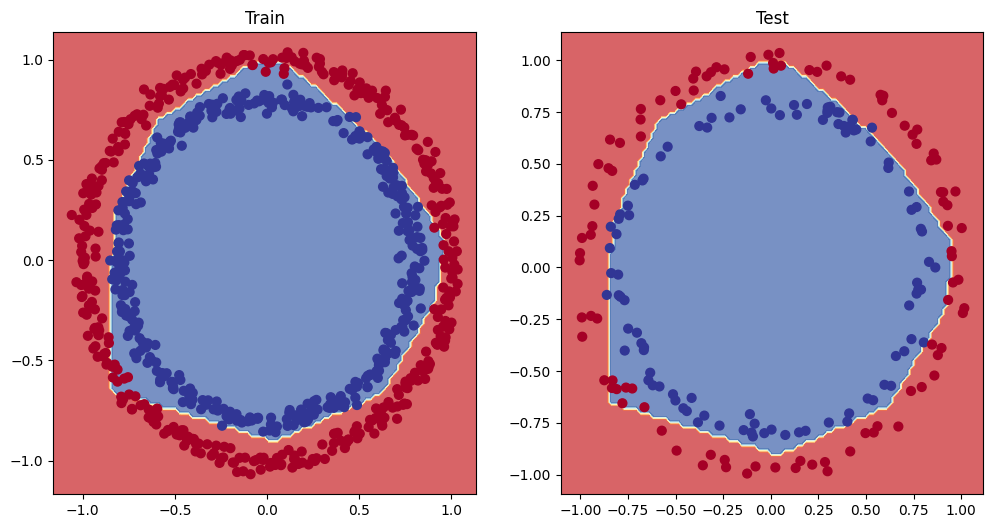

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_3,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_3,X=X_test,y=y_test)

## 7. Replicating non-Linear activation functions

Neural_netwoks, rather than us telling the model what to *learn*, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions.

In [ ]:
# Create a tensor
A = torch.arange(-10,10,1, dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

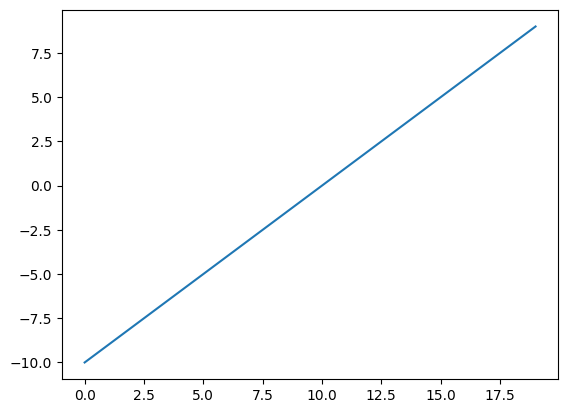

In [ ]:
# Visualie this data
plt.plot(A)

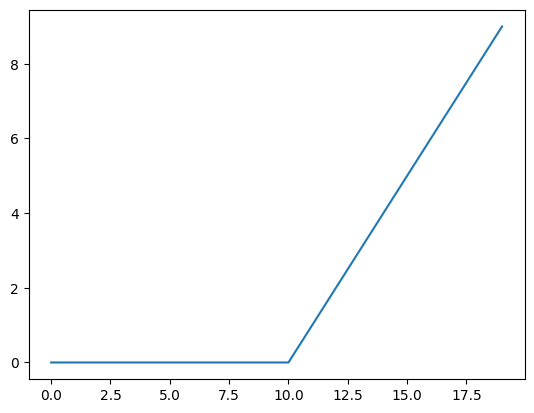

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x:torch.Tensor) -> torch.tensor:
  return torch.maximum(torch.tensor(0),x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

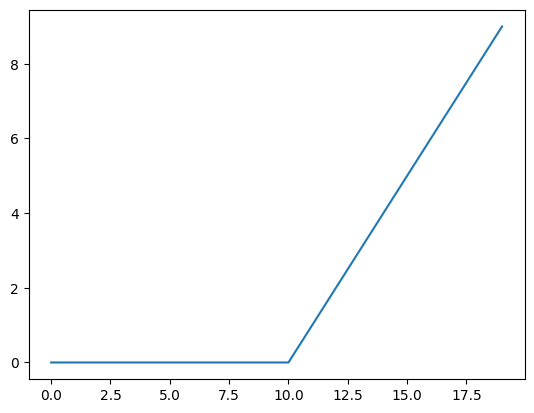

In [ ]:
# plot relu activation functions
plt.plot(relu(A))

In [ ]:
# Now let's do the same for sigmoid
def sigmoid(x):
  return 1/(1+ torch.exp(-x))



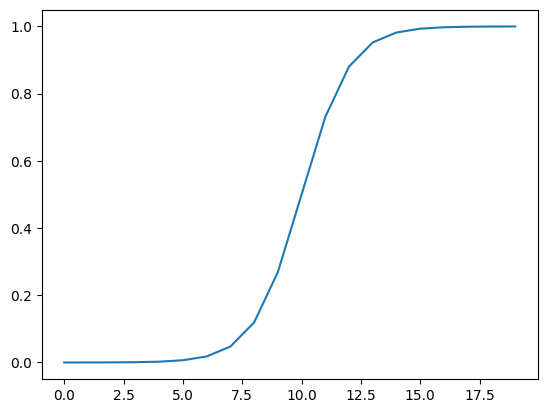

In [ ]:
plt.plot(torch.sigmoid(A))

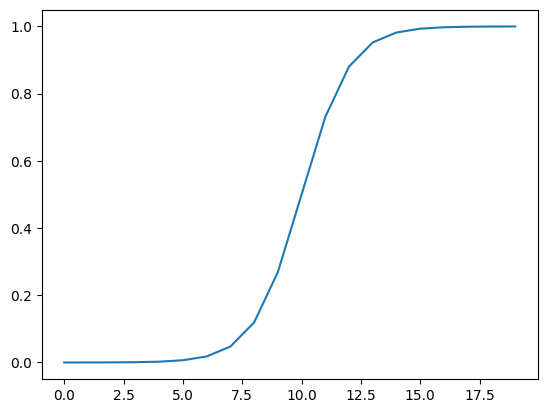

In [ ]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs.  dog, spam vs. not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

Recall a **binary classification** problem deals with classifying something as one of two options (e.g. a photo as a cat photo or a dog photo) where as a **multi-class classification** problem deals with classifying something from a list of *more than* two options (e.g. classifying a photo as a cat a dog or a chicken).

![binary vs multi-class classification image with the example of dog vs cat for binary classification and dog vs cat vs chicken for multi-class classification](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-binary-vs-multi-class-classification.png)
*Example of binary vs. multi-class classification. Binary deals with two classes (one thing or another), where as multi-class classification can deal with any number of classes over two, for example, the popular [ImageNet-1k dataset](https://www.image-net.org/) is used as a computer vision benchmark and has 1000 classes.*

### Creating a toy multi-class dataset

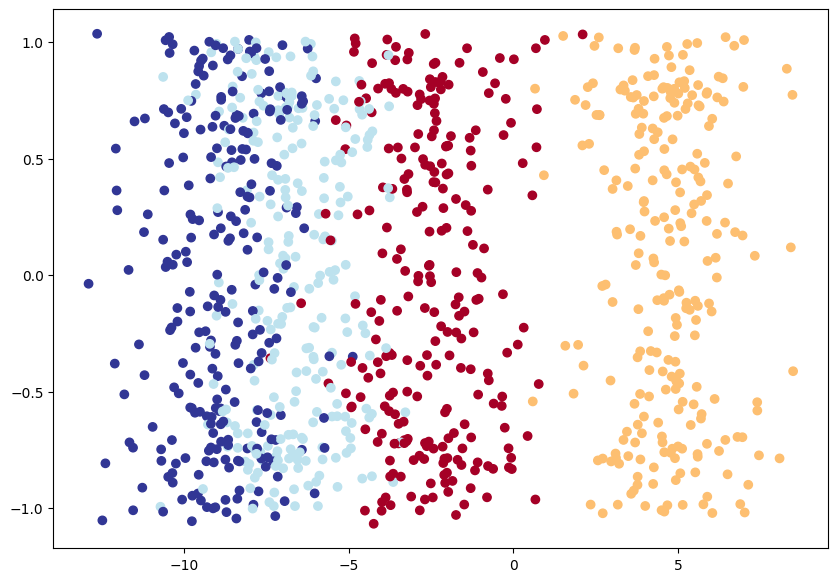

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-AC.org/0.15/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std = 1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED,
                            )

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train ,X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,y_blob,test_size=0.2,random_state=RANDOM_SEED)

# 4. plot data (visualize!, visualize!,visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X[:,1],c =y_blob, cmap=plt.cm.RdYlBu)


In [ ]:
X_blob_train.shape , y_blob_train.shape,X_blob_test.shape, y_blob_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

### 8.2  Building a multi-class classification model in PyTorch

How about we build one similar to `model_3` but this is still capable of handling multi-class data?

To do so, let's create a subclass of `nn.Module` that takes in three hyperparameters:
* `input_features` - the number of `X` features coming into the model.
* `output_features` - the ideal numbers of output features we'd like (this will be equivalent to `NUM_CLASSES` or the number of classes in your multi-class classification problem).
* `hidden_units` - the number of hidden neurons we'd like each hidden layer to use.

Since we're putting things together, let's setup some device agnostic code (we don't have to do this again in the same notebook, it's only a reminder).

In [ ]:
# Create a device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model,

    Args:
      input_features (int): Number of input features to the model
      out_features (int): Number of output features
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and an optimizer for a multi-class classification model
Since we're working on a multi-class classification problem, we'll use the `nn.CrossEntropyLoss()` method as our loss function.

And we'll stick with using SGD with a learning rate of 0.1 for optimizing our `model_4` parameters.

In [ ]:
# Create a loss function for multiclass classification - loss function measures how wrong our model's predictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # learning rate is a hyperparameter you can change


### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to predictions labels

Logits (raw ouput of the model)-> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of probabilities)

In [ ]:
# Let's get some raw ouputs of our model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[-0.8294, -0.6839, -1.5804, -1.1695],
        [ 0.3150, -0.1745,  0.1625,  0.0236],
        [ 0.8404, -0.0173,  0.2878, -0.5044],
        [-0.5074, -0.3063, -0.9238, -0.7890],
        [-0.2101, -1.2519, -1.1801, -0.6229],
        [ 0.3260, -0.1498,  0.1967,  0.0374],
        [ 0.7363,  0.0102,  0.2043, -0.6082],
        [ 0.0698, -0.8390, -0.7259, -0.3541],
        [ 1.0233, -0.0437,  0.3895, -0.4317],
        [ 0.0304, -0.9426, -0.8531, -0.4033]])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
# convert logists outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.8294, -0.6839, -1.5804, -1.1695],
        [ 0.3150, -0.1745,  0.1625,  0.0236],
        [ 0.8404, -0.0173,  0.2878, -0.5044],
        [-0.5074, -0.3063, -0.9238, -0.7890],
        [-0.2101, -1.2519, -1.1801, -0.6229]])
tensor([[0.2994, 0.3463, 0.1413, 0.2131],
        [0.3107, 0.1904, 0.2668, 0.2321],
        [0.4424, 0.1876, 0.2546, 0.1153],
        [0.2750, 0.3362, 0.1813, 0.2075],
        [0.4178, 0.1474, 0.1584, 0.2765]])


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(1)

In [ ]:
# Convert our model's predictions probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [ ]:
# Fit the multi-class model to the data
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Loop in through data
for epoch in range(epochs):
  ### Training
  model_4.train()


  # Logits (raw ouput of the model)-> Pred probs (use torch.softmax) -> Pred labels (take the argmax of probabilities)
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # loss function check how our model prediction is wrong than our original data
  loss = loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_pred=y_pred,y_true=y_blob_train)

  # it helps in to make in iteration to reset the grads
  optimizer.zero_grad()

  # backward prop helps for to update grads in terms of changing parameters like derivatives wrt parameters
  loss.backward()

  # optimizer.step() function help to update the optimized parameter
  optimizer.step()


  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim =1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,y_pred=test_preds)

  # print out what's happening
  if epoch % 10==0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 1.1770 | Acc: 47.88% | Test loss: 1.0337, Test acc: 70.00
Epoch: 10 | Loss: 0.2945 | Acc: 99.25% | Test loss: 0.2736, Test acc: 99.50
Epoch: 20 | Loss: 0.1114 | Acc: 99.12% | Test loss: 0.1044, Test acc: 99.50
Epoch: 30 | Loss: 0.0692 | Acc: 99.00% | Test loss: 0.0633, Test acc: 99.50
Epoch: 40 | Loss: 0.0533 | Acc: 99.00% | Test loss: 0.0470, Test acc: 99.50
Epoch: 50 | Loss: 0.0452 | Acc: 99.00% | Test loss: 0.0384, Test acc: 99.50
Epoch: 60 | Loss: 0.0404 | Acc: 99.12% | Test loss: 0.0332, Test acc: 99.50
Epoch: 70 | Loss: 0.0372 | Acc: 99.12% | Test loss: 0.0297, Test acc: 99.50
Epoch: 80 | Loss: 0.0349 | Acc: 99.12% | Test loss: 0.0271, Test acc: 99.50
Epoch: 90 | Loss: 0.0333 | Acc: 99.12% | Test loss: 0.0252, Test acc: 99.50


### 8.6 Making and evaluating predictions with PyTorch multi-class model

In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.5848e-03, 9.9841e-01, 5.9229e-07, 3.9784e-07],
        [4.1300e-03, 1.8731e-04, 7.7909e-04, 9.9490e-01],
        [2.3733e-05, 1.1767e-05, 9.9985e-01, 1.1161e-04],
        [2.0989e-03, 9.9779e-01, 6.9758e-05, 4.3206e-05],
        [9.9498e-01, 4.9977e-03, 2.5310e-06, 2.1502e-05],
        [5.9066e-04, 2.5616e-05, 2.1677e-04, 9.9917e-01],
        [5.1290e-05, 3.3986e-05, 9.9987e-01, 4.7759e-05],
        [9.9832e-01, 3.8717e-04, 3.4528e-05, 1.2606e-03],
        [3.5192e-06, 1.1634e-06, 9.9984e-01, 1.5592e-04],
        [9.9902e-01, 6.6816e-04, 1.3840e-05, 2.9530e-04]])

In [ ]:
y_pred_probs[:1].sum()

tensor(1.)

In [ ]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

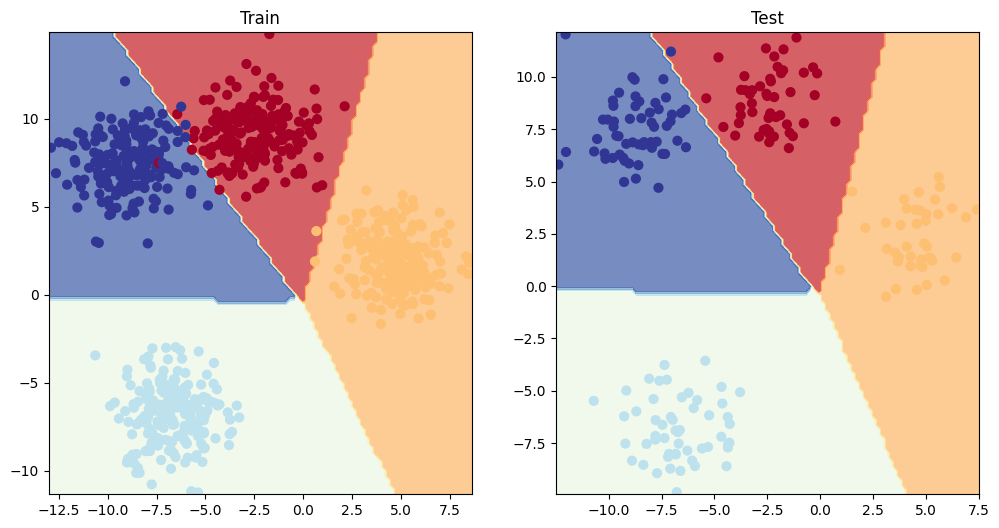

In [ ]:
# Get some visual
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_4,X=X_blob_train,y=y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_4,X=X_blob_test,y=y_blob_test)